### Importação dos dados



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [77]:
#Cores que serão utilizadas nos gráficos
cores = ['#DE7CF0','#F07881', '#CBC2F0','#F0ADDA', '#F071CA', '#E79AF5','#BBD6F0', '#9E93F5', '#7B11F0']

#1. Análise do faturamento


In [155]:
#Calculando o faturamento total de cada loja e média de faturamento de todas as lojas

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [loja["Preço"].sum(), loja2["Preço"].sum(), loja3["Preço"].sum(), loja4["Preço"].sum()]
faturamento_total = pd.DataFrame({"Loja": lojas, "Faturamento": faturamento})

#Cálculo da media de faturamento
media_faturamento = faturamento_total["Faturamento"].mean()

faturamento_total

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

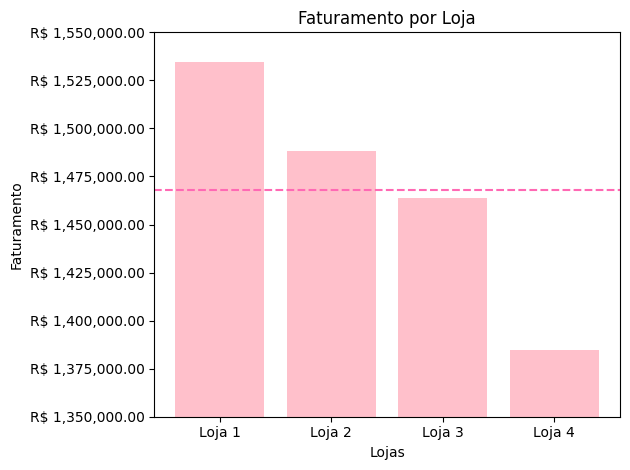

In [151]:
#Plotando o gráfico de faturamento por loja
plt.bar(faturamento_total['Loja'], faturamento_total['Faturamento'], color = 'pink')
plt.axhline(y = media_faturamento, color = 'hotpink', linestyle='--')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
def formato_real(x, pos):
    return f'R$ {x:,.2f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))
plt.ylim(1350000, 1550000)

plt.tight_layout()
plt.show()

Analisando o faturamento total de cada loja podemos perceber que a Loja 1 se destaca como tendo o maior faturamento entre as lojas e a Loja 4 possui o pior faturamento entre as lojas analisadas.

Com a linha tracejada representando a média de faturamento entre as lojas, podemos perceber que apenas as Lojas 1 e 2 estão acima desse limite.

# 2. Vendas por Categoria


In [129]:
def vendas_categoria(i):
  categoria_loja = set(i['Categoria do Produto']) #descobre quais são as categorias
  total_vendas = {}
  for categoria in categoria_loja:
    quantidade = i['Categoria do Produto'].value_counts()[categoria]
    total_vendas[categoria] = int(quantidade)
    total_vendas_ordenadas = dict(sorted(total_vendas.items(), key=lambda item: item[1], reverse=True))
  return total_vendas_ordenadas

resultado_loja = (vendas_categoria(loja))
resultado_loja2 = (vendas_categoria(loja2))
resultado_loja3 = (vendas_categoria(loja3))
resultado_loja4 = (vendas_categoria(loja4))

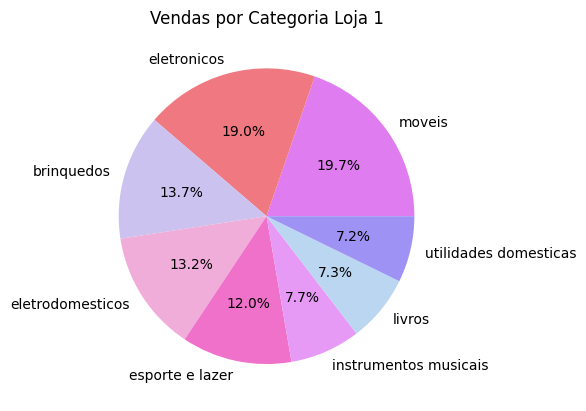

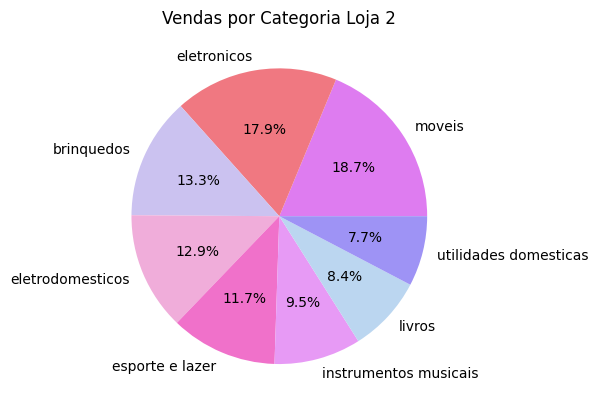

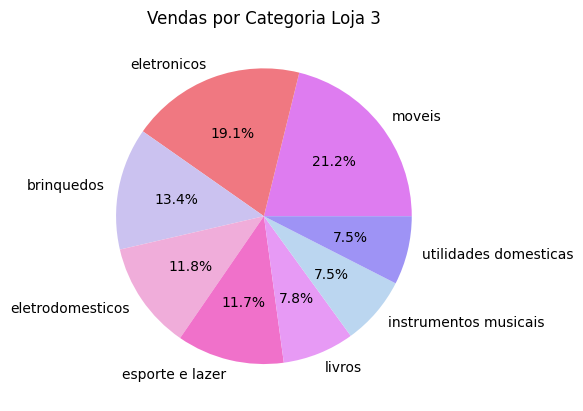

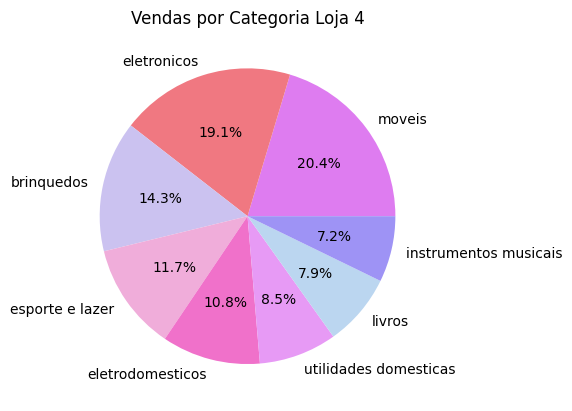

In [139]:
def vendas_categoria_grafico(categoria, loja):

  plt.pie(categoria.values(), labels= categoria.keys(), autopct='%1.1f%%', colors = cores)
  plt.title(f'Vendas por Categoria {loja}')
  plt.show()

vendas_categoria_grafico(resultado_loja, 'Loja 1')
print('\n')
vendas_categoria_grafico(resultado_loja2, 'Loja 2')
print('\n')
vendas_categoria_grafico(resultado_loja3, 'Loja 3')
print('\n')
vendas_categoria_grafico(resultado_loja4, 'Loja 4')

As quatro lojas vendem produtos classificadas dentro das mesmas 8 categorias: Brinquedos, Eletrodomésticos, Eletrônicos, Esporte e Lazer, Instrumentos Musicais, Livros, Móveis e Utilidades Domésticas.

Todas as lojas mostraram uma melhor venda na categoria de Móveis compondo cerca de 20% das vendas de todas as lojas.
As categorias de Eletrônicos, Brinquedos, Esporte e Lazer e Eletrodomésticos também se saíram bem em todas as lojas, constituindo em todas as lojas um percentual maior que 10% das vendas para cada categoria.

A categoria menos vendida foi a de Utilidades Domésticas, tendo ficado em último lugar em todas as lojas, com exceção da quarta loja, em que ocupa a sexta posição entre as categorias.


# 3. Média de Avaliação das Lojas

In [24]:
media_avaliacoes = []
def media_avaliacao(i):
  avaliacao_loja = sum(i['Avaliação da compra']) #Soma as avaliações de uma loja
  media = avaliacao_loja / len(i['Avaliação da compra'])
  return round(media, 2)

media_avaliacoes.append(media_avaliacao(loja))
media_avaliacoes.append(media_avaliacao(loja2))
media_avaliacoes.append(media_avaliacao(loja3))
media_avaliacoes.append(media_avaliacao(loja4))

media_avaliacoes

media_geral_avaliacoes = sum(media_avaliacoes) / len(media_avaliacoes)

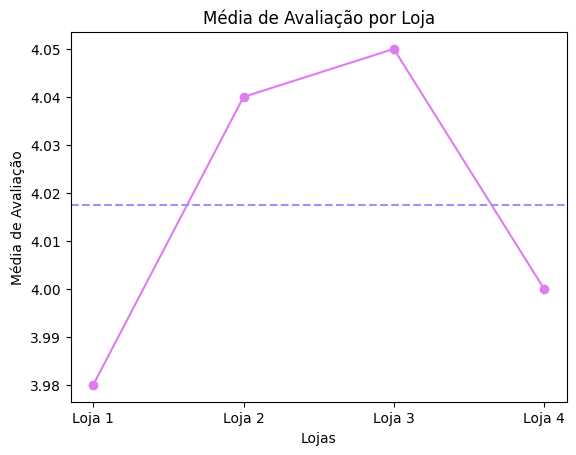

In [81]:
plt.plot(lojas, media_avaliacoes, marker='o', color = cores[0])
plt.axhline(y = media_geral_avaliacoes, color = cores[7], linestyle='--')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.show()

Mesmo tendo apresentado o maior faturamento, a Loja 1 se mostra a menos bem avaliada, seguida das Lojas 4, 2 e 3, nesta ordem.

Por mais que o gráfico sugira uma grande discrepância entre as avaliações médias das lojas, a diferença entre as lojas no pior e melhor lugares é de apenas 0,07 pontos

# 4. Produtos Mais e Menos Vendidos

In [117]:
def produtos_mais_menos_vendidos(loja):
    contagem_produtos = loja['Produto'].value_counts()

    top_mais = contagem_produtos.head(5)
    top_menos = contagem_produtos.tail(5)
    return top_mais, top_menos

mais_vendidos_loja1 , menos_vendidos_loja1 = produtos_mais_menos_vendidos(loja)
mais_vendidos_loja2 , menos_vendidos_loja2 = produtos_mais_menos_vendidos(loja2)
mais_vendidos_loja3 , menos_vendidos_loja3 = produtos_mais_menos_vendidos(loja3)
mais_vendidos_loja4 , menos_vendidos_loja4 = produtos_mais_menos_vendidos(loja4)



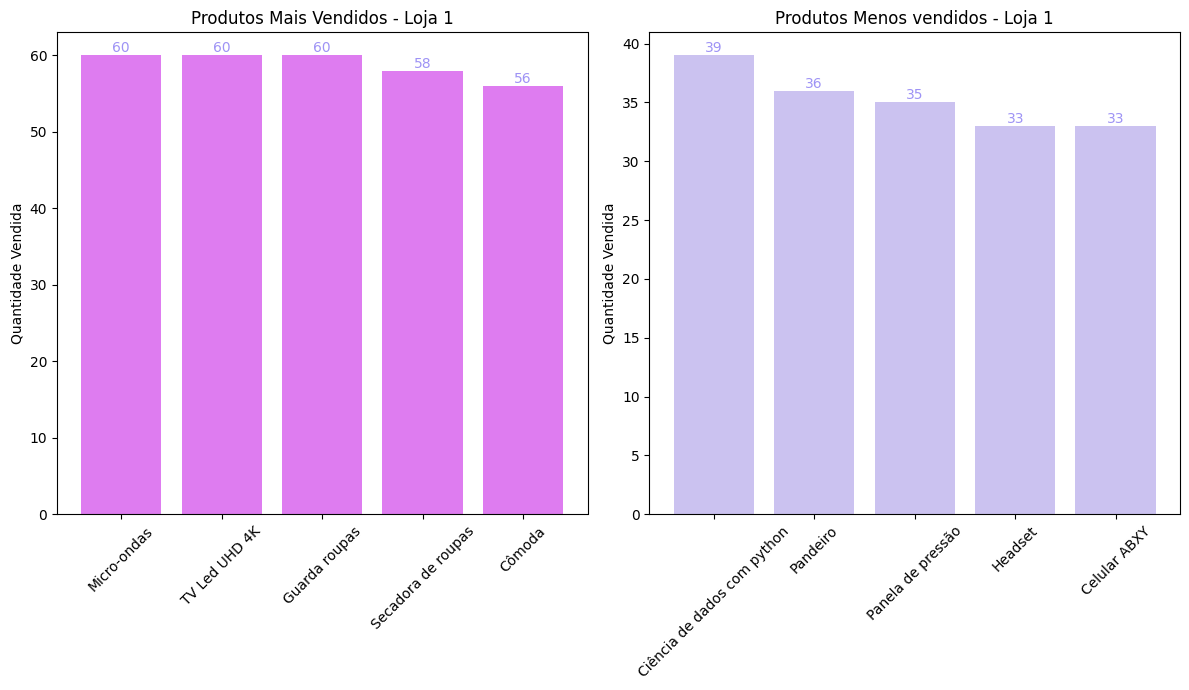

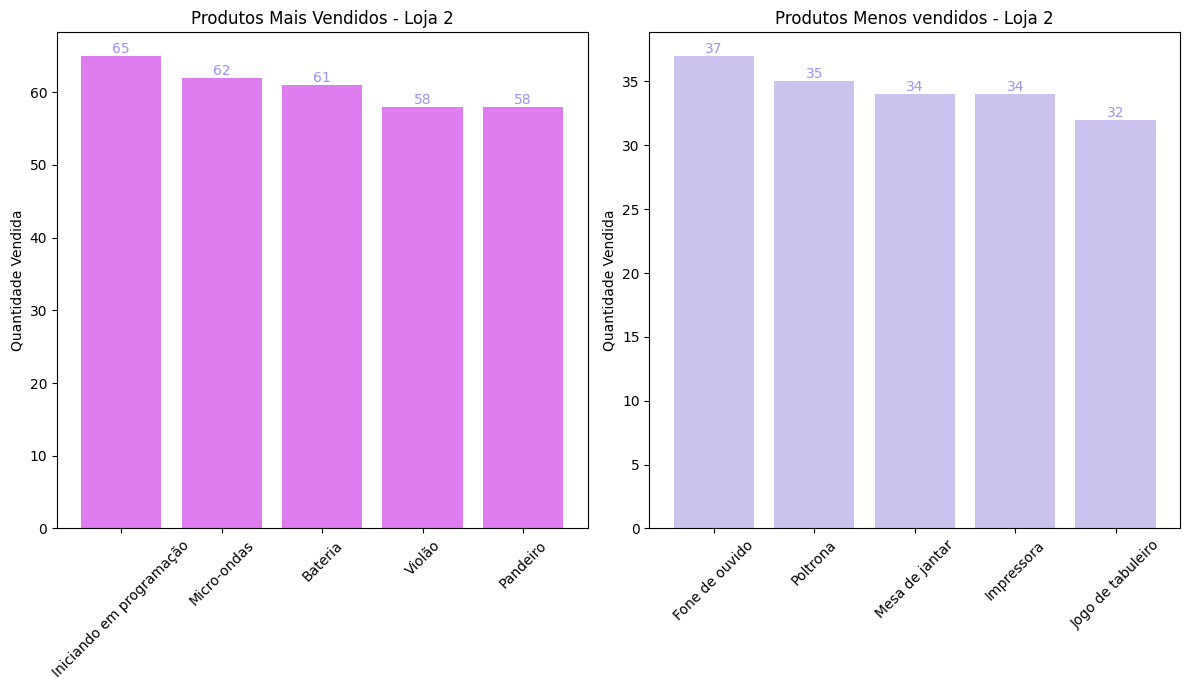

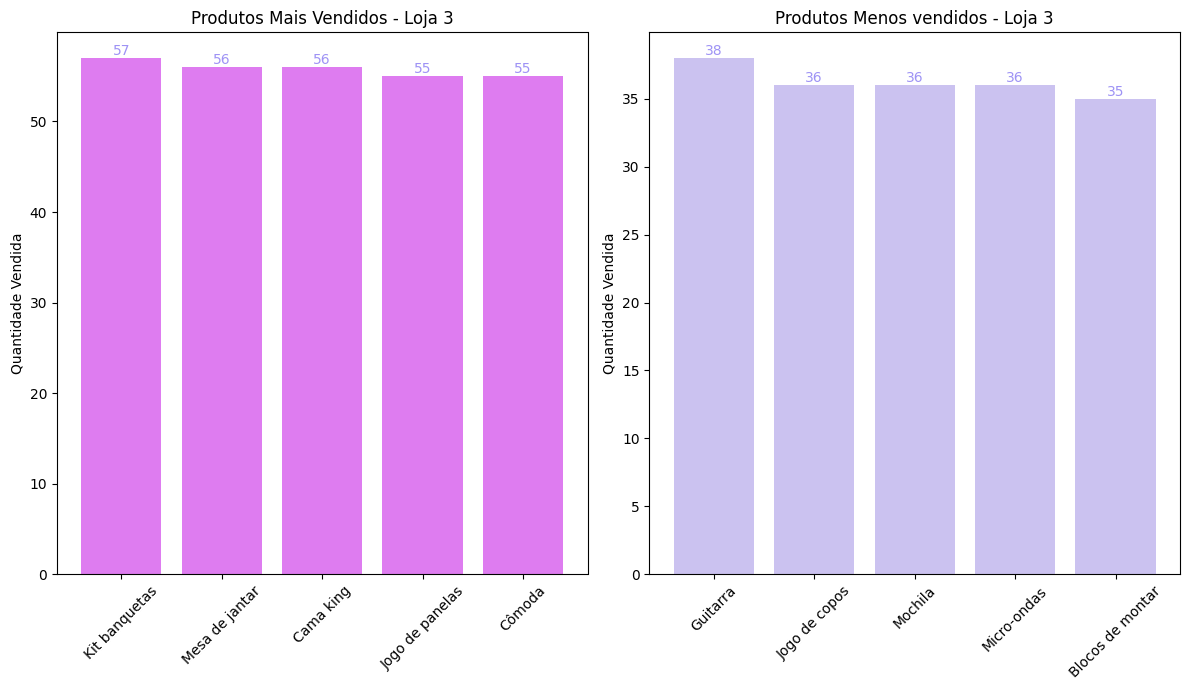

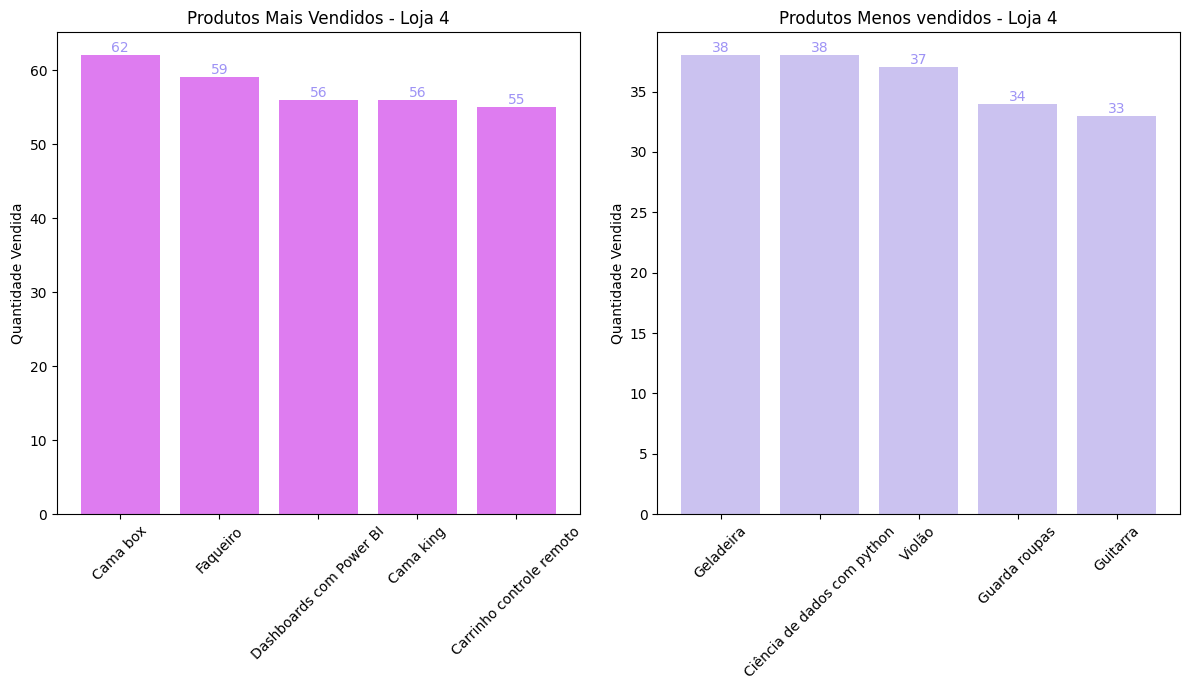

In [149]:
# Função para plotar os 5 produtos mais e os 5 menos vendidos
def produtos_mais_menos_vendidos(df, loja):
    contagem_produtos = df['Produto'].value_counts()

    top_mais = contagem_produtos.head(5)
    top_menos = contagem_produtos.tail(5)

    # Criação de uma figura com gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))

    # Gráfico 1
    bars1 = axes[0].bar(top_mais.index, top_mais.values, color=cores[0])
    axes[0].set_title(f'Produtos Mais Vendidos - {loja}')
    axes[0].set_ylabel('Quantidade Vendida')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].bar_label(bars1, label_type='edge', color=cores[-1])

    # Gráfico 2
    bars2 = axes[1].bar(top_menos.index, top_menos.values, color=cores[2])
    axes[1].set_title(f'Produtos Menos vendidos - {loja}')
    axes[1].set_ylabel('Quantidade Vendida')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].bar_label(bars2, label_type='edge', color=cores[-1])

    plt.tight_layout()
    plt.show()


# Aplicando para cada loja
produtos_mais_menos_vendidos(loja, "Loja 1")
produtos_mais_menos_vendidos(loja2, "Loja 2")
produtos_mais_menos_vendidos(loja3, "Loja 3")
produtos_mais_menos_vendidos(loja4, "Loja 4")

Loja 1 \\
  Produtos mais vendido: Micro-ondas \\
  Produto menos vendido: Celular ABXY \\
Loja 2 \\
  Produtos mais vendido: Iniciando em Programação \\
  Produto menos vendido:  Jogo de Tabuleiro \\
Loja 3 \\
  Produtos mais vendido: Kit Banquetas \\
  Produto menos vendido:  Blocos de Montar \\
Loja 4 \\
  Produtos mais vendido:  Cama Box \\
  Produto menos vendido:   Guitarra \\

# 5. Frete Médio por Loja


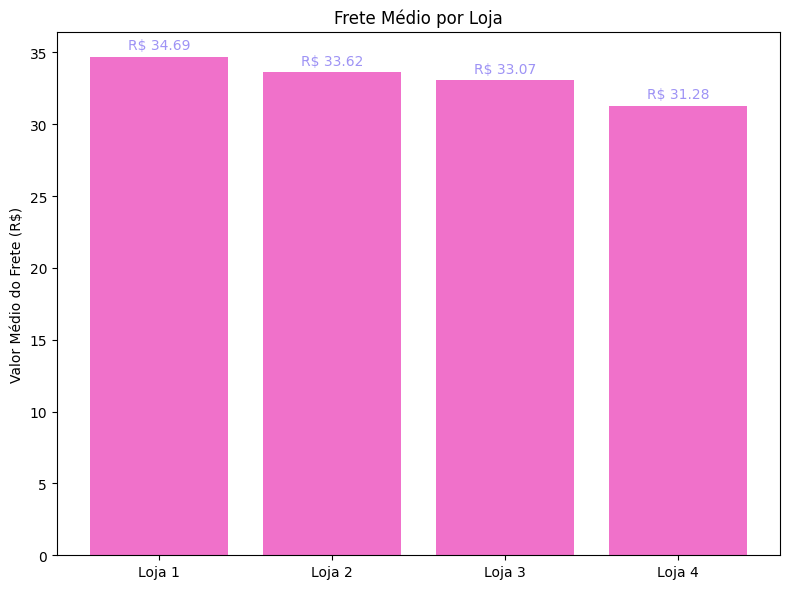

In [145]:
# Calcular o frete médio por loja
frete_medio = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Plotar gráfico
plt.figure(figsize=(8, 6))
barras = plt.bar(frete_medio.keys(), frete_medio.values(), color=cores[4])
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
# Adicionando os valores no topo de cada barra
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'R$ {yval:.2f}', ha='center', va='bottom', fontsize=10, color= cores[-1])

plt.tight_layout()
plt.show()

O frete médio entre as lojas se mostrou similar, na faixa dos 30 reais por venda

# Relatório Final

 1. Faturamento (R$)

Loja 1: 1.534.509,12 → maior faturamento

Loja 2: 1.488.459,06

Loja 3: 1.464.025,03

Loja 4: 1.384.497,58 → menor faturamento


2. Média de Avaliação

Loja 3: 4.05 → melhor avaliação

Loja 2: 4.04

Loja 4: 4.00

Loja 1: 3.98 → pior avaliação


3. Frete Médio (R$)

Loja 4: 31.28 → mais barato

Loja 3: 33.07

Loja 2: 33.62

Loja 1: 34.69 → mais caro


## Conclusão:
A melhor indicação de venda para o Seu João seria da **Loja 4**, com exceção do valor médio do frete, ela não se destacou em nenhuma outra análise realizada. Com a venda da loja, os recursos poderão ser melhores realocados em melhorias das três lojas existentes. Uma sugestão seria na melhoria das avaliações recebidas pela Loja 1.